In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_cbd_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBD
0,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
1,14,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.001046
2,15,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0.001046
3,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
4,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..CBD'], axis = 1)
y = df_mlp[['X..CBD']]

<AxesSubplot:ylabel='Count'>

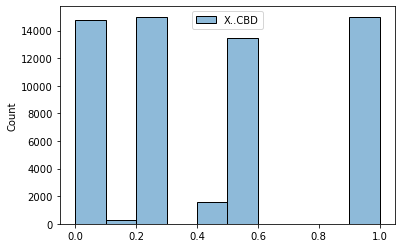

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.11610152822024086

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.7666378392380886

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.7024330820922862

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([9.18348428e-02, 9.17502400e-02, 1.04977892e-01, 1.92194407e-01,
       1.23874484e-01, 4.18642394e-02, 2.02914495e-02, 2.52271000e-02,
       7.97339913e-05, 1.93016524e-03, 4.98757938e-03, 0.00000000e+00,
       9.48579406e-03, 7.06299250e-05, 6.06072575e-03, 5.01002596e-03,
       7.52054575e-03, 1.15713421e-02, 1.39576572e-19, 1.76481223e-02,
       0.00000000e+00, 1.69684445e-05, 4.52134916e-03, 7.23060706e-03,
       1.78325660e-02, 2.74882186e-03, 7.15880318e-03, 6.93257690e-05,
       2.43196752e-05, 3.56162745e-03, 1.10614857e-02, 1.63022877e-05,
       5.53725375e-03, 0.00000000e+00, 0.00000000e+00, 5.34933215e-03,
       6.41073328e-03, 4.65804347e-03, 8.54172211e-04, 7.36079117e-05,
       5.09191306e-05, 4.38554981e-03, 7.66856287e-05, 1.07446795e-02,
       9.28183541e-04, 3.54856147e-03, 1.12573691e-03, 4.66570234e-04,
       8.33297792e-03, 9.04890850e-04, 1.01471344e-02, 6.08945833e-03,
       1.97105682e-03, 5.80422319e-04, 4.54137865e-03, 9.12357677e-04,
      

In [16]:
selector.threshold_

0.01162790697674419

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,euphoric,happy,pine,sweet
0,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,1,0,0
1,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,1,0,0,0
2,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,1,0,0
3,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
4,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,1,1,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0
59997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,1,1,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'euphoric',
 'happy',
 'pine',
 'sweet']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_cbd.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_cbd.pkl")

['selected_X_mlp_lsa_elbow_cbd.pkl']

In [34]:
import joblib

selected_X = joblib.load("selected_X_mlp_lsa_elbow_cbd.pkl")

Train test split (after Feature Selection)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [36]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [37]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.18528610813408594

In [39]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.5021477658941929

In [40]:
#val
r2_score(y_val, y_pred_mlpreg)

0.4680843306852993

Hyperparameter Tuning

In [41]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [42]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [43]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [44]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'tanh'}

In [45]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_cbd.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_cbd.pkl")

['rscv_mlp_lsa_elbow_best_params_cbd.pkl']

MLP fit (after hyperparameter tuning)

In [46]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'tanh', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.0904413521589033

In [48]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.8763623865911223

In [49]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.7677539212317206

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [50]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [51]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_cbd.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_cbd.pkl")

['y_test_mlpreg_lsa_elbow_cbd.pkl']

In [52]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.08766170220344457

In [53]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.030099381849021587

In [54]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.17349173423832498

In [55]:
r2_score(y_test, y_pred_mlpreg_test)

0.7733672744001852

Error analysis

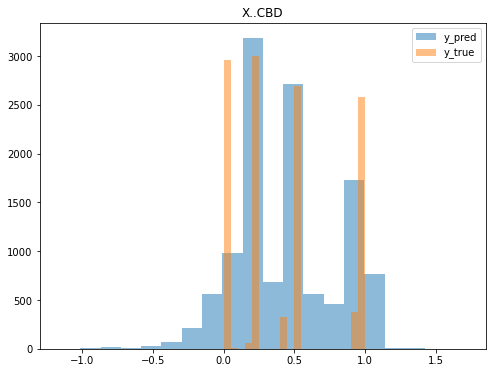

<Figure size 432x288 with 0 Axes>

In [56]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_cbd.png')

Pearson R

In [57]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.883
P-value: 0.000


<AxesSubplot:>

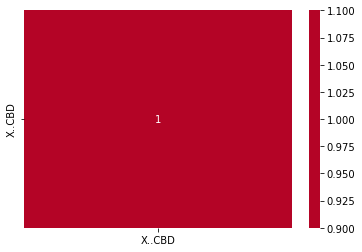

In [58]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)